In [12]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
woah_file = "woah-mono.wav"
tool_file = "tool-mono.wav"

In [31]:
ipd.Audio(woah_file)

In [33]:
ipd.Audio(tool_file)

In [34]:
woah, sr = librosa.load(woah_file)
tool, _ = librosa.load(tool_file)

In [5]:
woah.size

210254

In [35]:
tool.size

256014

In [6]:
sample_duration = 1 / sr
print(f"Duration of 1 sample is: {sample_duration:.6f} seconds")

Duration of 1 sample is: 0.000045 seconds


In [37]:
woah_duration = sample_duration * len(woah)
tool_duration = sample_duration * len(tool)
print(f"Duration of woah signal is: {woah_duration:.2f} seconds")
print(f"Duration of tool signal is: {tool_duration:.2f} seconds")

Duration of woah signal is: 9.54 seconds
Duration of tool signal is: 11.61 seconds
Duration of rip signal is: 15.08 seconds


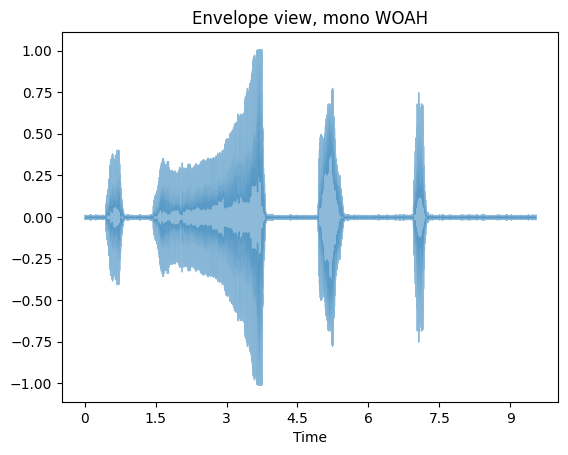

In [11]:
fig, ax = plt.subplots(nrows=3)
librosa.display.waveshow(woah, sr=sr, ax=ax, alpha=0.5)
ax.set(title='Envelope view, mono WOAH')
ax.label_outer()

In [24]:
FRAME_SIZE = 1024
HOP_LENGTH = 512
def amplitude_envelope(signal, frame_size, hop_length):
    amplitude_envelope = []
    for i in range(0,len(signal), hop_length):
        current_frame_amplitude_envelope  = max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_amplitude_envelope)
    
    return np.array(amplitude_envelope)

def fancy_amplitude_envelope(signal, frame_size, hop_length):
    return np.array([max(signal[i:i+frame_size]) for i in range(0,len(signal),hop_length)])

In [19]:
ae_woah = amplitude_envelope(woah, FRAME_SIZE, HOP_LENGTH)
len(ae_woah)

411

In [25]:
fancy_ae_woah = fancy_amplitude_envelope(woah, FRAME_SIZE, HOP_LENGTH)
len(fancy_ae_woah)

411

In [26]:
(ae_woah == fancy_ae_woah).all()

True

In [38]:
ae_tool = amplitude_envelope(tool, FRAME_SIZE, HOP_LENGTH)

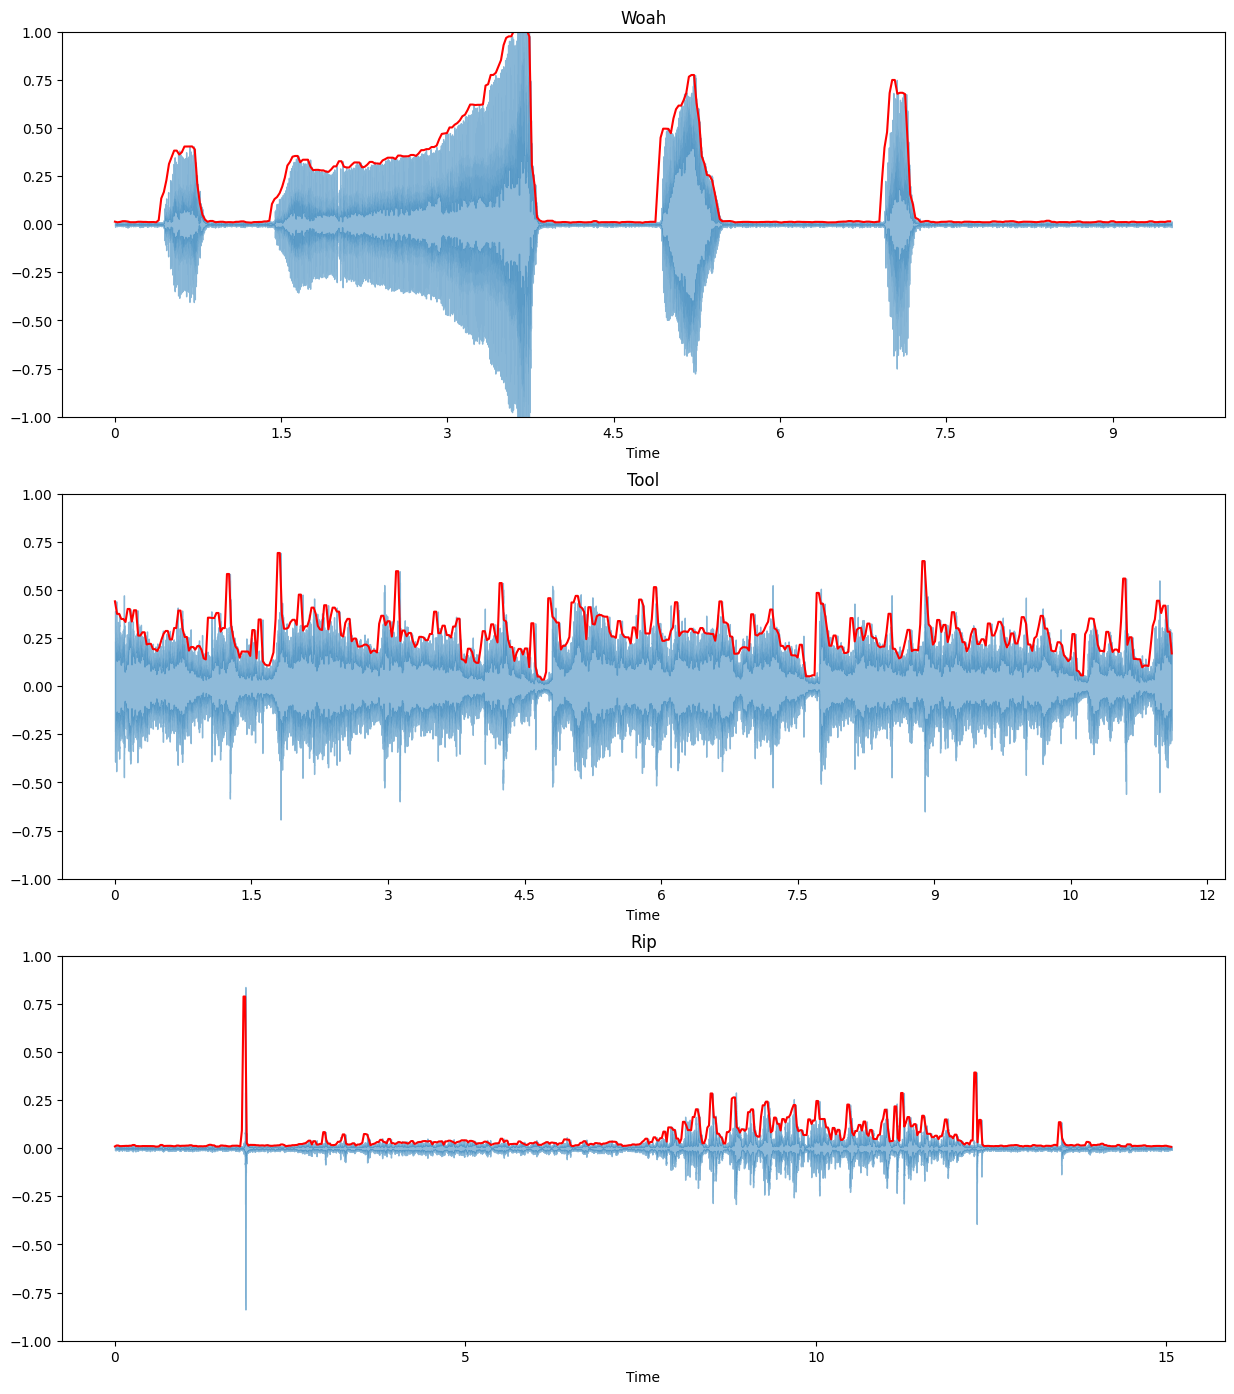

In [42]:
frames = range(0, ae_woah.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
librosa.display.waveshow(woah, alpha=0.5)
plt.plot(t, ae_woah, color="r")
plt.title("Woah")
plt.ylim((-1,1))

frames = range(0, ae_tool.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.subplot(3,1,2)
librosa.display.waveshow(tool, alpha=0.5)
plt.plot(t, ae_tool, color="r")
plt.title("Tool")
plt.ylim((-1,1))


plt.show()